In [92]:
import numpy as np
import pandas as pd  
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.datasets import load_boston
#df_boston = load_boston()
df_boston = pd.read_csv(load_boston()['filename'], skiprows=1)
df_boston.shape

(506, 14)

In [4]:
#инфа про датасет
#print(load_boston()['DESCR'])

 CRIM - уровень преступности на душу населения
 ZN - доля жилой земли
 INDUS  - доля неторговой площади на город
 CHAS -?
 NOX - концентрация окиси озота
 RM - среднее кол-во комнат в доме
AGE - домовладельцы, доля
DIS - расстояние до 5 центров зантости
RAD - индекс доступности к магистралям
TAX - ставка налога на имущество
PTRATIO  - соотноение ученик-учитель
B - доля чернокожего населения
LSTAT - более низвий статус населения
MEDV - средняя стоимость домов

In [5]:
df_boston.isnull().sum()
#наш дата сет без пропусков

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [6]:
df_boston.describe().iloc[1:]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
#создадим датасет только с аргументами, удалив столбец MEDV
df_arg = df_boston.drop('MEDV', 1)

1) обучим нашу модель без удаления признаков, а используя все атрибуты.

In [8]:
X = df_arg
y = df_boston['MEDV']

In [9]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


In [10]:
estimator = LinearRegression()
estimator.fit(x_train, y_train)

y_pred = estimator.predict(x_test)

In [11]:
print("R2: \t", r2_score(y_test, y_pred))
print("RMSE: \t", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE: \t", mean_absolute_error(y_test, y_pred))

R2: 	 0.7555033086871311
RMSE: 	 4.859731895955123
MAE: 	 3.2484820876164218


получили коэф. детерминации 0.75. пока непонятно хорошо это или плохо)

_____________________________________________________________________________________________________________

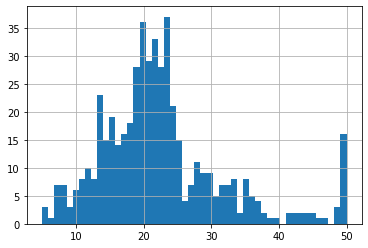

In [12]:
#построим гистограмму предсказываемой переменной MEDV.
x = df_boston.MEDV
plt.hist(x, bins=50)
plt.grid()

Можно заметить что распеделение близко в нормальному, но существуют выброс. Удалим его и проведем обучение снова. 

_____________________________________________________________________________________________________________

2) обучаем нашу модель, используя все атрибуты, удалив выброс из переменной MEDV

In [46]:
#удалим все значения 50 в столбце MEDV
df_boston_2 = df_boston.loc[df_boston['MEDV'] != 50]
#создадит датасет только с аргументами
df_arg_2 = df_boston_2.drop('MEDV', 1)

In [47]:
X = df_arg_2
y = df_boston_2['MEDV']

In [48]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(392, 13)
(98, 13)
(392,)
(98,)


In [49]:
estimator = LinearRegression()
estimator.fit(x_train, y_train)

y_pred = estimator.predict(x_test)

In [50]:
print("R2: \t", r2_score(y_test, y_pred))
print("RMSE: \t", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE: \t", mean_absolute_error(y_test, y_pred))

R2: 	 0.8509323089087224
RMSE: 	 3.3576499451154187
MAE: 	 2.4762383169302336


Получили коэффициент детерминации 0.85. Модель обучилась лучше, чем в первом случае. 

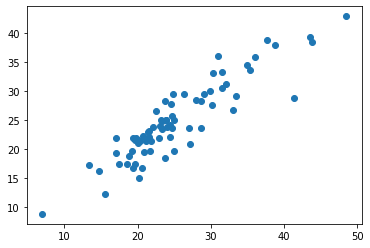

In [113]:
plt.scatter(y_test,y_pred)
plt.show()

_____________________________________________________________________________________________________________

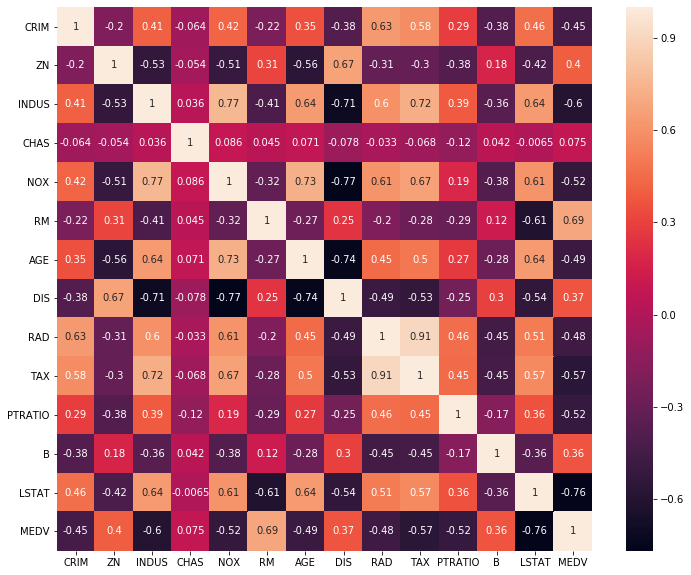

In [51]:
#построим матрицу корреляций, используя DS с удаленными выбросами
fig, ax = plt.subplots(figsize=(12,10)) 
hm = sns.heatmap(df_boston_2.corr(),annot=True)

_____________________________________________________________________________________________________________

3) Для обучения линейной модели выберем те признаки, которые имеют наибольшую корреляцию с целевым параметром MEDV. Из матрицы корреляций видно что это LSTAT, который имеет отрицательную корреляцию(-0.76) с MEDV и RM, который имеет положительную корреляцию(0.69) с MEDV

In [52]:
X = df_arg_2[['LSTAT','RM']]
y = df_boston_2['MEDV']
#print(X)
#print(y)

In [53]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(392, 2)
(98, 2)
(392,)
(98,)


In [54]:
estimator = LinearRegression()
estimator.fit(x_train, y_train)

y_pred = estimator.predict(x_test)

In [55]:
print("R2: \t", r2_score(y_test, y_pred))
print("RMSE: \t", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE: \t", mean_absolute_error(y_test, y_pred))

R2: 	 0.7448045405312271
RMSE: 	 4.393191407633263
MAE: 	 3.201822940823966


Получили коэффициент детерминации 0.74. Это значение меньше, чем при работе со всеми атрибутами

_____________________________________________________________________________________________________________

4) Рассмотрим переменную RAD

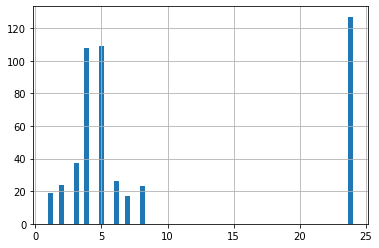

In [85]:
#строим гитограмму
x = df_arg_2.RAD
plt.hist(x, bins=60)
plt.grid()

Наблюдаем выброс, удаляем его

In [87]:
#удалим большие значения RAD из ds boston_2, в котором уже удалены выбросы переменной MEDV
df_boston_4 = df_boston_2.loc[df_boston['RAD'] < 20]

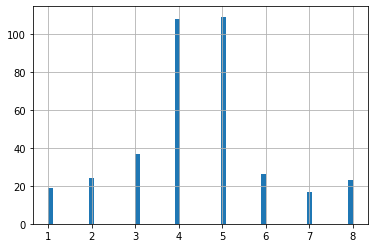

In [88]:
x = df_boston_4.RAD
plt.hist(x, bins=60)
plt.grid()

In [102]:
#df_boston_4.shape
#создаем ds со всеми аргументами и с удаленными выбросами значенися RAD
df_arg_4 = df_boston_4.drop('MEDV', 1)

In [103]:
X = df_arg_4 
y = df_boston_4['MEDV']
#print(X)
#print(y)

In [104]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(290, 13)
(73, 13)
(290,)
(73,)


In [115]:
estimator = LinearRegression()
estimator.fit(x_train, y_train)

y_pred = estimator.predict(x_test)

In [116]:
print("R2: \t", r2_score(y_test, y_pred))
print("RMSE: \t", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE: \t", mean_absolute_error(y_test, y_pred))

R2: 	 0.8187399430076868
RMSE: 	 3.143233038297161
MAE: 	 2.3231513976991476


In [117]:
estimator.coef_

array([-5.46264667e-02,  2.49453439e-02, -4.51191579e-02,  6.78647377e-01,
       -1.19426958e+00,  8.25690029e+00, -6.49368524e-02, -9.40016529e-01,
        3.08884364e-01, -1.07893653e-02, -5.89436686e-01,  1.61964539e-02,
        2.61677970e-03])

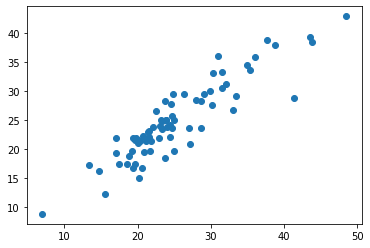

In [118]:
plt.scatter(y_test,y_pred)
plt.show()